In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

# Create the model using Functional API
inputs = tf.keras.Input(shape=(784,))
hidden = layers.Dense(64, activation='relu', name="HiddenLayer1")(inputs)
outputs = layers.Dense(10, activation='softmax')(hidden)
model = models.Model(inputs=inputs, outputs=outputs)
print(model.summary())

# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8474 - loss: 0.5385 - val_accuracy: 0.9582 - val_loss: 0.1519
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9529 - loss: 0.1624 - val_accuracy: 0.9655 - val_loss: 0.1204
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9674 - loss: 0.1131 - val_accuracy: 0.9723 - val_loss: 0.1026


In [ ]:
# Create sub-model to get hidden layer output
activation_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('HiddenLayer1').output)

In [ ]:
# Create a dictionary to store activations for each digit
digit_activations = {}

# Loop through digits 0-9 and store activations
for digit in range(10):
    digit_images = x_test[y_test == digit]  # Get all images of the current digit
    avg_activations = []

    # Compute activations for the first 5 images of the current digit (for speed)
    for img in digit_images[:5]:
        img = img.reshape(1, -1)  # Flatten the image
        activations = activation_model.predict(img, verbose=0)
        avg_activations.append(activations[0])

    # Compute average activations for the digit
    avg_activations = np.mean(avg_activations, axis=0)
    digit_activations[digit] = avg_activations

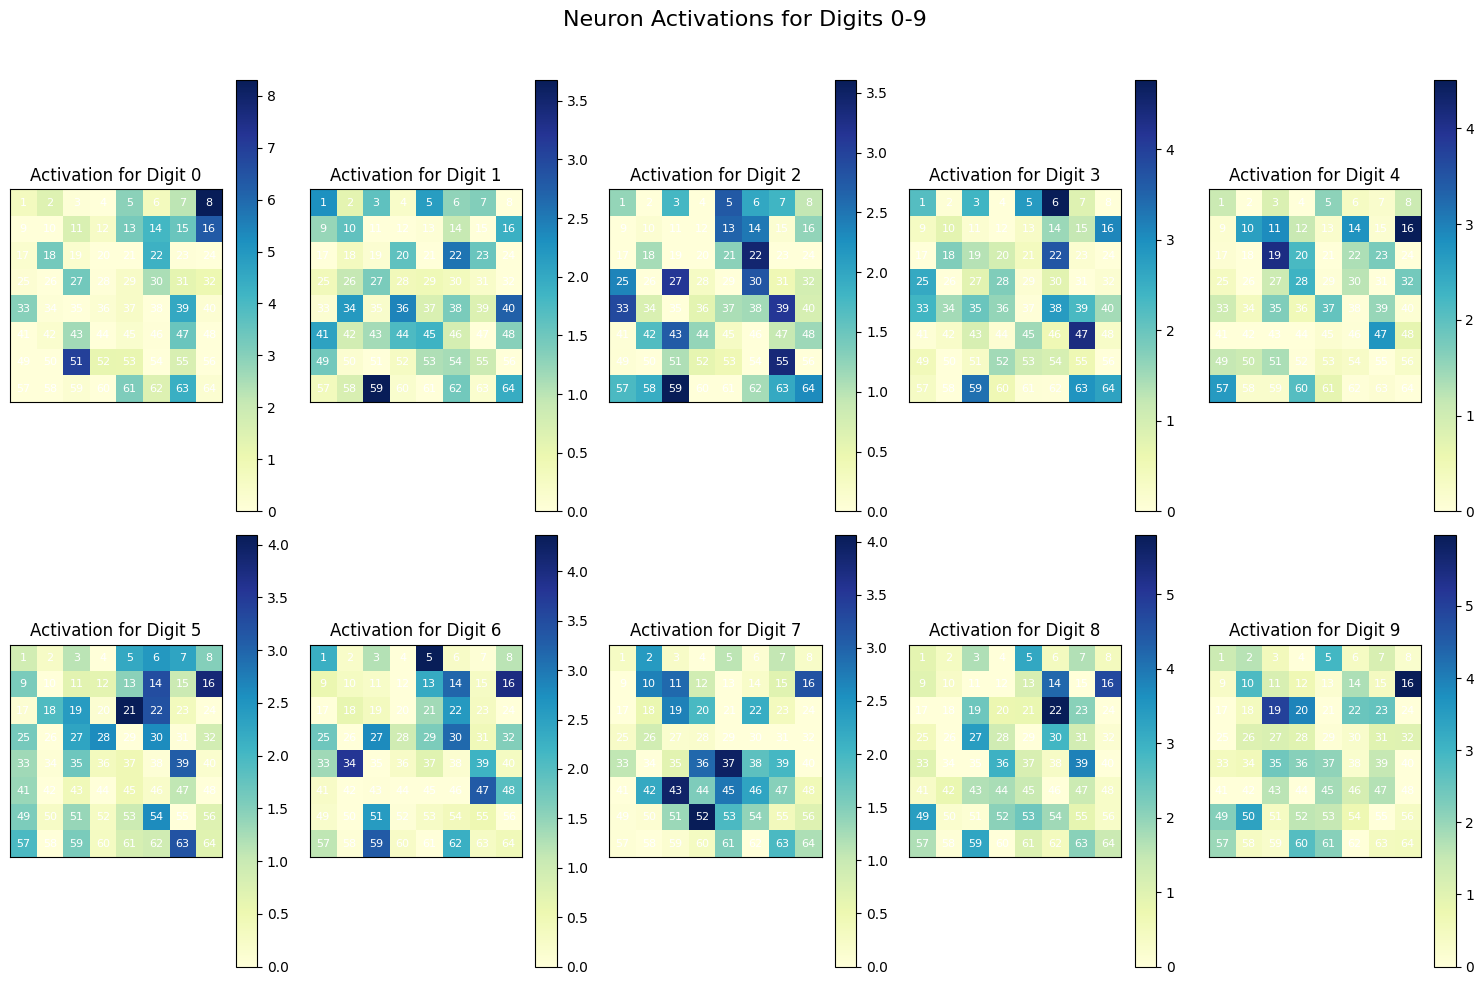

In [ ]:
# Plot the average activations for each digit using heatmaps
plt.figure(figsize=(15, 10))

for digit in range(10):
    plt.subplot(2, 5, digit+1)
    im = plt.imshow(digit_activations[digit].reshape(8, 8), cmap='YlGnBu', interpolation='nearest')

    # Add neuron index labels
    neuron_indices = np.arange(1, 65).reshape(8, 8)

    # Display the neuron indices on the heatmap
    for i in range(8):
        for j in range(8):
            plt.text(j, i, str(neuron_indices[i, j]), ha='center', va='center', color='white', fontsize=8)

    # Title and axis labels
    plt.title(f'Activation for Digit {digit}')
    plt.xticks([])
    plt.yticks([])
    # plt.xlabel('Neuron Index')
    # plt.ylabel('Neuron Index')

    # Add colorbar to explain color scale
    plt.colorbar(im)  # Add a colorbar to show the activation scale

# Overall title
plt.suptitle("Neuron Activations for Digits 0-9", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()